# Método das cordas para raízes de função

#### Importar as biblioteas

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import sys, os, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

import plot
import numpy as np
import matplotlib.pyplot as plt

#### Definir a função

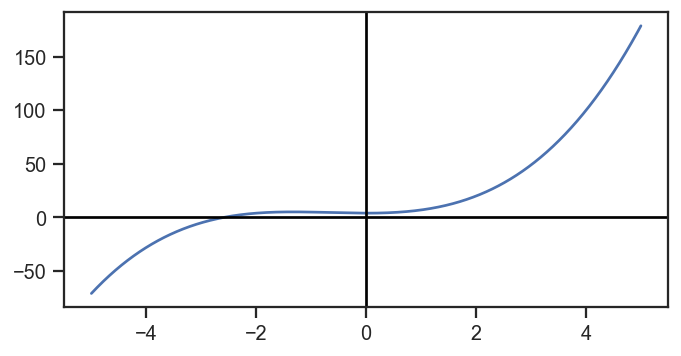

In [2]:
f = lambda x : x**3+2*x**2+4

leftlimit = -5
rightlimit = 5

xarr = np.linspace(leftlimit,rightlimit,1000)
yarr = f(xarr)
plot.plot(xarr,yarr)

#### Definir os limites

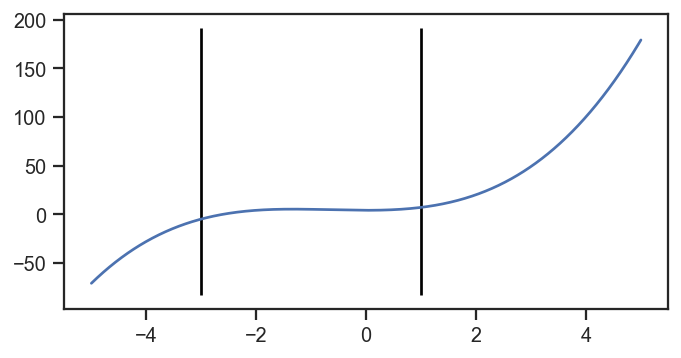

In [3]:
a = -3
b = 1
e = 1e-7
plot.plotrange(xarr,yarr,a,b)

#### Função do método das cordas
$x^{(n)}=\frac{a \cdot f(b) - b \cdot f(a)}{f(b)-f(a)}$

In [4]:
def cordas(f,a,b) :
    fa = f(a)
    fb = f(b)
    return (a*fb-b*fa)/(fb-fa)

#### Relação dos triângulos

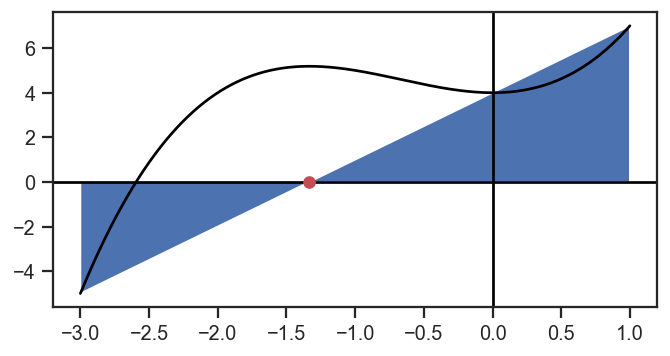

In [5]:
plt.figure(figsize=(6, 3), dpi=130)

rarr = np.linspace(a,b,1000)

x = cordas(f,a,b)

plt.axhline(0, color='black')
plt.axvline(0, color='black')

t1 = plt.Polygon([[a,0],[a,f(a)],[x,0]])
t2 = plt.Polygon([[b,0],[b,f(b)],[x,0]])

ax = plt.gca()
ax.add_patch(t1)
ax.add_patch(t2)

plt.plot(rarr, f(rarr), color='black')

plt.plot(x, 0, 'ro')

plt.show()

#### Executar em loop até $f(x^{(n)}) \leq \epsilon$

* Se $f(a)*f(x^{(n)})>0$; então $a = x^{(n)}$
    - $f(a)$ e $f(x^{(n)})$ estão com o mesmo sinal, não contribuíndo para achar a raíz, troca-se $a$.
* Se $f(a)*f(x^{(n)})<0$; então $b = x^{(n)}$
    - $f(a)$ e $f(x^{(n)})$ estão com sinais diferentes, logo $f(x^{(n)})$ está com o mesmo sinal de $f(b)$, troca-se $b$.

A raíz está em -2.5943130138129327


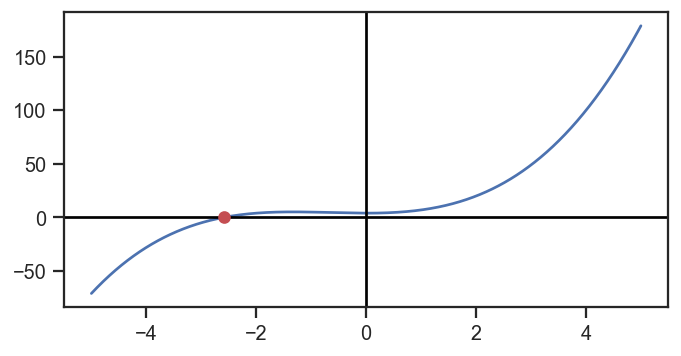

0 -1.3333333333333333 5.185185185185185
1 -2.1818181818181817 3.134485349361384
2 -2.4970906068162924 0.9004106598563641
3 -2.5738352614969093 0.1985548860840911
4 -2.5901123025132597 0.04112437179796302
5 -2.593456075216262 0.00840588397437081
6 -2.594138400319575 0.001713527802781556
7 -2.5942774436956637 0.00034910731331017075
8 -2.5943057698602057 7.111772241508163e-05
9 -2.5943115401880603 1.4487277233854456e-05
10 -2.594312715648892 2.951166230502622e-06
11 -2.5943129550988733 6.011739621669676e-07
12 -2.594313003876565 1.224634758045795e-07
13 -2.5943130138129327 2.4946690047045195e-08


In [6]:
n = 0
r = [[x,n]]
while abs(f(x))>e :
    if f(a)*f(x)>0 : a=x
    else :           b=x
    x = cordas(f,a,b)
    n+=1
    r.append([x,n])

print(f"A raíz está em {x}")
plot.plotdot(xarr,yarr,[(x,0)])

for x in r :
    print(x[1], x[0], f(x[0]))